# Machine Learning - Arvore de Decisão

#### Importação das bibliotecas necessárias

In [1]:
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np
import pandas as pd

#### Carregando a base de dados iris

In [2]:
iris = load_iris()

#### Verificando a descrição do dataset


In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### Verificando features names, target e dados

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Dividindo os dados em treino e teste

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.3)

#### Verificando a forma dos dados

In [9]:
X_train.shape,X_test.shape

((105, 4), (45, 4))

In [10]:
y_train.shape,y_test.shape

((105,), (45,))

#### Instânciando o objeto classificador

In [6]:
clf = tree.DecisionTreeClassifier()

#### Parâmetros do  classificador DecisionTreeClassifier
* criterion: medida de qualidade da divisão
* splitter: estratégia utilizada para dividir o nó de decisão
* max_depth: profundidade máxima da árvore
* min_samples_split: número de amostras mínimas para considerar um nó para divisão
* min_samples_leaf: número de amostras mínimas no nível folha

#### Treinando o modelo de arvore de decisão

In [7]:
clf = clf.fit(X_train,y_train)

#### Verificando as features mais importantes para o modelo de arvore de decisão treinado

In [8]:
clf.feature_importances_ 

array([0.01927313, 0.        , 0.04435879, 0.93636809])

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
for feature,importancia in zip(iris.feature_names,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

sepal length (cm):0.019273127753303965
sepal width (cm):0.0
petal length (cm):0.04435878609887421
petal width (cm):0.9363680861478217


#### Executando o algoritmo de arvore de decisão com o conjunto de teste

In [10]:
resultado = clf.predict(X_test)
resultado

array([2, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0, 2, 1,
       1])

In [11]:
y_test

array([2, 0, 2, 1, 1, 1, 1, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 1, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0, 2, 1,
       2])

#### Testando com uma nova amostra

In [12]:
test = np.array([[5.1,3.5,1.4,0.2]])
clf.predict(test)

array([0])

#### Verificando a probabilidade

In [17]:
clf.predict_proba(test)

array([[1., 0., 0.]])

#### Métricas de Validação

In [13]:
print (pd.crosstab(y_test, resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2  All
Real                    
0        14   0   0   14
1         0   9   0    9
2         0   3  19   22
All      14  12  19   45


In [14]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.75      1.00      0.86         9
   virginica       1.00      0.86      0.93        22

    accuracy                           0.93        45
   macro avg       0.92      0.95      0.93        45
weighted avg       0.95      0.93      0.94        45



#### Biblioteca para utilização de widgets interativos

In [ ]:
!pip install ipywidgets # A exclamação indica que o comando pip é do meu sistema operacional python.

#### Bibliotecas para visualização da arvore de recisão

In [ ]:
!pip3 install pydot

In [ ]:
!pip3 install graphviz

In [ ]:
conda install graphviz

In [ ]:
conda install pydot

#### Importando as bibliotecas instaladas

In [15]:
import pydot
import graphviz 
from ipywidgets import interactive

#### Visualizando de forma gráfica a arvore gerada

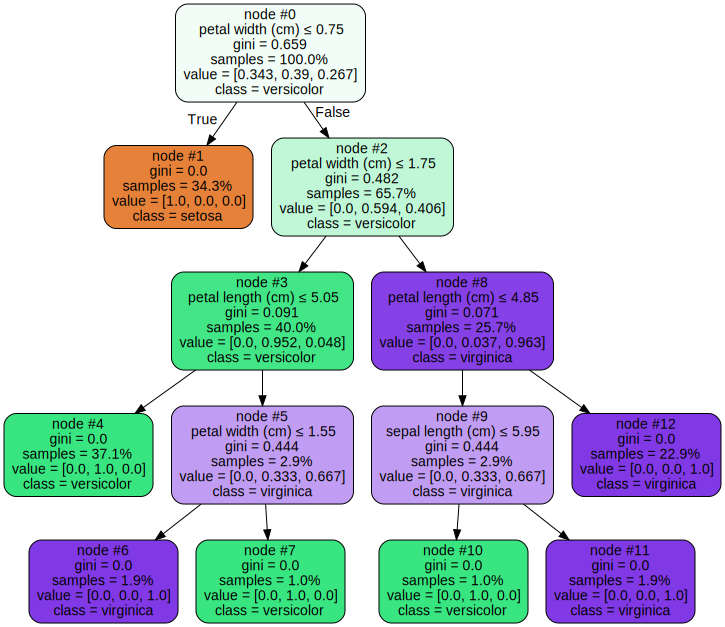

In [16]:
dot_data = tree.export_graphviz(
         clf, 
         out_file=None,
         feature_names=iris.feature_names,
         class_names=iris.target_names,  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

#### Bibliotecas necessárias para renderização da arvore de forma interativa

In [17]:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source                   

#### Renderizando a arvore de forma interativa através da manipulação de parametros

In [25]:
features_label

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
# load dataset
data = load_iris()

# feature matrix
X = data.data

# target vector
y = data.target

# feature labels
features_label = data.feature_names

# class label
class_label = data.target_names


def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
    estimator = tree.DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_split
          ,min_samples_leaf=min_leaf
    )

    estimator.fit(X, y)
    graph = Source(tree.export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5]
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

#### Navegando na estrutura de uma arvore de decisão

In [19]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)#por padrao 25%.

In [20]:
estimator = tree.DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
estimator.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [21]:
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

In [22]:
print("Número de nós: {}".format(n_nodes))
print("Indices a esquerda: {}".format(children_left))
print("Indices a direita: {}".format(children_right))
print("Feature: {}".format(feature))
print("Limite (threshold: {}".format(threshold))

Número de nós: 5
Indices a esquerda: [ 1 -1  3 -1 -1]
Indices a direita: [ 2 -1  4 -1 -1]
Feature: [ 3 -2  2 -2 -2]
Limite (threshold: [ 0.80000001 -2.          4.95000005 -2.         -2.        ]


In [23]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("\nA arvore binária tem %s nós e a seguinte estrutura: \n"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snó=%s (nó folha)." % (node_depth[i] * "\t", i))
    else:
        print("%snó=%s (nó teste): vai para o nó %s se o valor do atributo %s <= %s \n se não, vai para o "
              "nó %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 iris.feature_names[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))


A arvore binária tem 5 nós e a seguinte estrutura: 

nó=0 (nó teste): vai para o nó 1 se o valor do atributo petal width (cm) <= 0.800000011920929 
 se não, vai para o nó 2.
	nó=1 (nó folha).
	nó=2 (nó teste): vai para o nó 3 se o valor do atributo petal length (cm) <= 4.950000047683716 
 se não, vai para o nó 4.
		nó=3 (nó folha).
		nó=4 (nó folha).


#### Extraindo regras da arvore gerada a partir de uma determinada amostra do conjunto de teste X_teste


In [24]:
node_indicator = estimator.decision_path(X_test)
node_indicator
leave_id = estimator.apply(X_test)
leave_id

array([4, 3, 1, 4, 1, 4, 1, 3, 3, 3, 4, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3,
       1, 1, 3, 1, 1, 3, 3, 1, 4, 3, 1, 3, 4, 3, 1, 4], dtype=int64)

In [25]:
def extrai_regras(sample_id):
    node_indicator = estimator.decision_path(X_test)

    leave_id = estimator.apply(X_test)

    #sample_id = sample
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]

    print('\nRegras usadas para predizer a amostra %s' % (sample_id))

    for f,v in zip(iris.feature_names,X_test[sample_id]):
        print('%s = %s'%(f,v))

    print('\n')      
    for node_id in node_index:
        if leave_id[sample_id] == node_id:
            continue

        if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("id do nó de decisão %s : (atributo %s com valor = %s %s %s)"
              % (node_id,
                 iris.feature_names[node_id],
                 X_test[sample_id, feature[node_id]],
                 threshold_sign,
                 threshold[node_id]))
    pred =estimator.predict(X_test[sample_id].reshape(1, -1)) 
    print("\tClasse => %s" %iris.target_names[pred])

In [26]:
extrai_regras(2)


Regras usadas para predizer a amostra 2
sepal length (cm) = 5.5
sepal width (cm) = 4.2
petal length (cm) = 1.4
petal width (cm) = 0.2


id do nó de decisão 0 : (atributo sepal length (cm) com valor = 0.2 <= 0.800000011920929)
	Classe => ['setosa']


#### Instalação da biblioteca mlextend para visualização das fronteiras de complexidade

In [27]:
!pip install mlxtend

#### Entendendo o parâmetro min-samples-split para criação do modelo de arvore de decisão

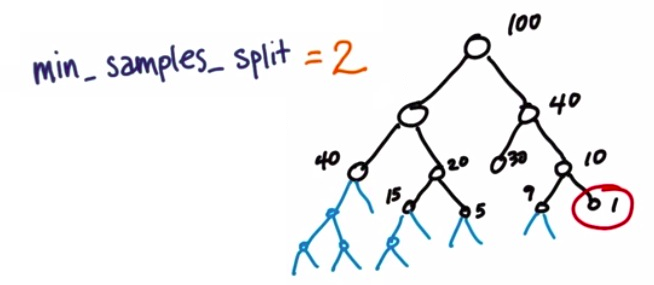

In [28]:
from IPython.display import Image
Image(filename ="imagens/min-samples-split.png", width=500, height=500)# Qunato maior o nivel deste atributo menos complexo o modelo ficará.

#### Visualizando as fronteiras criadas pela arvore

In [29]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [37]:
def visualize_fronteiras(msamples_split):
    X = iris.data[:, [0, 2]]#Todas as linhas e coluna 0 e 2.
    y = iris.target

    clf = tree.DecisionTreeClassifier(min_samples_split=msamples_split)
    tree1 = clf.fit(X, y)

    plt.figure(figsize=(8,5))
    plot_decision_regions(X, y, clf=tree1, legend=2)

    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.title('Decision Tree on Iris')
    plt.show()

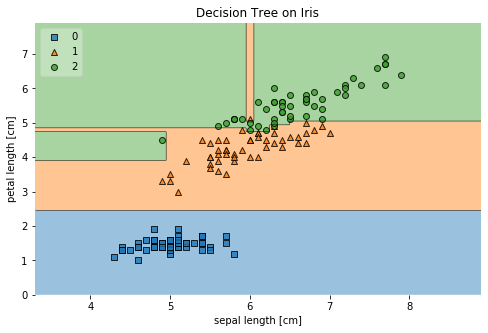

In [38]:
visualize_fronteiras(2)#Pra um nó ser considerado como uma previsão da arvor, é necessario ter no minimo 2 amostras abaixo dele.


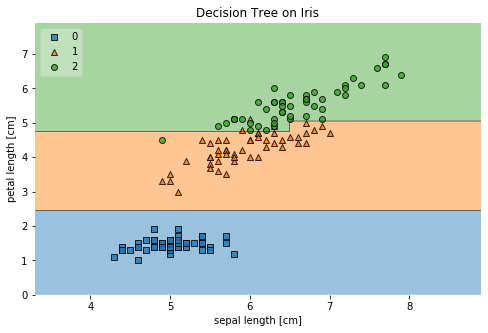

In [41]:
visualize_fronteiras(10)#Arvore vai cortar mais nós e ficara mais simples, portanto menos complexo, so que mais facil a sua utilização em produção.